# Nonlinear Greybox System Identification 

In this notebook we attempt to do greybox type of nonlinear system identification. The starting point is the dynamic given by Thomas Price and John Butt in *Catalyst Poisoning and Fixed Bed Reactor Dynamic II: Adiabatic Reactors*. 
The starting assumptions are the following:
1. The input to the dynamic is the inlet temperature, the aromatic flow rate, the sulfur flow rate.
2. Diffusion dynamic on planar axis is neglected.
3. Partial differentiation with respect to horizontal axis is approximated by its backward numerical differentiation,
   i.e., 
   $$\left. \dfrac{\partial T}{\partial z}\right|_{z=z_i} \approx \frac{1}{\Delta z} \left[T(z_i) - T(z_{i-1})\right],\\
     \left.\dfrac{\partial^2 T}{\partial^2 z}\right|_{z=z_i} \approx \frac{1}{\Delta z} \left[\left. \dfrac{\partial T}{\partial z}\right|_{z=z_i} - \left. \dfrac{\partial T}{\partial z}\right|_{z=z_{i-1}}\right],\\
     \approx \frac{1}{(\Delta z)^2}\left[T(z_i) - 2T(z_{i-1}) + T(z_{i-2})\right]\\
   $$

The pde of the catalyst dynamic is given by:
$$
\dfrac{d s_i}{dt} = K_0 \dfrac{\partial^2 s_i}{\partial^2 z} -K_1 \dfrac{\partial s_i}{\partial z}  - K_2 r_s(s_i,T_i) c_i,\\
\dfrac{d a_i}{dt} = K_3 \dfrac{\partial^2 a_i}{\partial^2 z} -K_1 \dfrac{\partial a_i}{\partial z} - K_2 r_a(a_i,T_i,c_i) c_i,\\
\dfrac{d T_i}{dt} = K_4 \dfrac{\partial^2 T_i}{\partial^2 z} -K_5 \dfrac{\partial T_i}{\partial z} + K_6 r_a(a_i,T_i,c_i) c_i,\\
\dfrac{d c_i}{dt} = K_7 r_s(s_i,T_i) c_i,
$$
   


Let the reactor is partitioned into $N$ layers, where for each, the temperature corresponds to that layer is measured. The state each layer is given by (all is normalized):
1. $s_i$ Sulfur concentration.
2. $a_i$ Aromatic concentration.
3. $T_i$ Temperature.
4. $c_i$ Catalyst activity.

where here $i = 1, \cdots, N$.

The inputs to the reactor are given by
1. $s_0$ Sulfur concentration at inlet.
2. $a_0$ Aromatic concentration at inlet.
3. $T_0$ Temperature inlet.

For each $i = 1, \cdots, N$ the dyanmics are expressed as follows:
$$
\dfrac{d s_i}{dt} = K_0 \dfrac{1}{(\Delta z)^2} \left[s_i(t) -2 s_{i-1}(t) + s_{i-2}(t)\right] -K_1 \dfrac{1}{\Delta z} \left[s_i(t) - s_{i-1}(t)\right]  - K_2 r_s(s_i,T_i) c_i,\\
\dfrac{d a_i}{dt} = K_3 \dfrac{1}{(\Delta z)^2} \left[a_i(t) -2 a_{i-1}(t) + a_{i-2}(t)\right] -K_1 \dfrac{1}{\Delta z} \left[a_i(t) - a_{i-1}(t)\right] - K_2 r_a(a_i,T_i,c_i) c_i,\\
\dfrac{d T_i}{dt} = K_4 \dfrac{1}{(\Delta z)^2} \left[T_i(t) -2 T_{i-1}(t) + T_{i-2}(t)\right] -K_5 \dfrac{1}{\Delta z} \left[T_i(t) - T_{i-1}(t)\right] + K_6 r_a(a_i,T_i,c_i) c_i,\\
\dfrac{d c_i}{dt} = K_7 r_s(s_i,T_i) c_i,
$$
where 
$$
r_a = -d_1 \exp\left(-d_2/T_i\right) a_i c_i,\\
r_s = -d_3 \exp\left(-d_4/T_i\right)s_i %\dfrac{d_3 \exp\left((d_4-d_5)/T_i\right)s_i}{1+d_6 \exp(d_4/T_i)s_i}.
$$

In these dynamical equations, the constants $K_j$ and $d_j$ belongs to $\mathbb{R}^+$, to be estimated from the data via nonlinear optimization algorithm. We do not include noises model in the dynamics nor in the measurement model. We would handle this via stochastic smoothing or Gaussian processes system identification. These dynamics will be the starting point. It is assumed that initially $c_i = 1, \forall i$.

We then discretize the dynamics above in time, resulting in the following dynamics:
$$
s_i(t+1) = s_i(t)+K_0 \dfrac{1}{(\Delta z)^2} \left[s_i(t) -2 s_{i-1}(t) + s_{i-2}(t)\right] -K_1 \dfrac{1}{\Delta z} \left[s_i(t) - s_{i-1}(t)\right]  - K_2 r_s(s_i,T_i) c_i,\\
a_i(t+1) = a_i(t)+K_3 \dfrac{1}{(\Delta z)^2} \left[a_i(t) -2 a_{i-1}(t) + a_{i-2}(t)\right] -K_1 \dfrac{1}{\Delta z} \left[a_i(t) - a_{i-1}(t)\right] - K_2 r_a(a_i,T_i,c_i) c_i,\\
T_i(t+1) = T_i(t)+K_4 \dfrac{1}{(\Delta z)^2} \left[T_i(t) -2 T_{i-1}(t) + T_{i-2}(t)\right] -K_5 \dfrac{1}{\Delta z} \left[T_i(t) - T_{i-1}(t)\right] + K_6 r_a(a_i,T_i,c_i) c_i,\\
c_i(t+1) = c_i(t)+ K_7 r_s(s_i,T_i) c_i,
$$

We could start $u(t,z_i) = K_4 r_a(s_i(t),T_i(t)) c_i(t)$.

$$
c_i = c_i(0) \exp(\int r_s(t) dt)\\
u_i = -r_a(a_i,T_i,c_i) c_i(0) \exp(\int r_s(t) dt)\\
    = d_1 \exp\left(-d_2/T_i\right) a_i c_i(0)^2 \exp(2 \int r_s(t) dt)\\
    = d_1 \exp\left(-d_2/T_i\right) \exp(\alpha_i(t,z_i)) c_i(0)^2 \exp(2 \int r_s(t,z_i) dt)\\
\log(u_i) = \log(d_1) -d_2/T_i + \alpha_i(t,z_i) + 2\log(c_i(0)) + 2 \int r_s(t,z_i) dt\\
$$

### Load necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import sys
import os
import pandas as pd
import datetime
import torch.nn as nn
Dtype = torch.float

Define discrete dynamics that will be used for system identification.

In [244]:
'''
Discrete catalyst dynamics, with assumption that the number of layer is 7
'''
# @torch.jit.script
def catalyst_dynamics(x,u,LayerNum,Delta_z,K,d):
#     #
#     LayerNum = 7
#     Delta_z = torch.tensor([1.,1.,1.,1.,1.,1.,1.],dtype=Dtype)
    
#     #parameters of dynamics
#     K = params[:5]
#     d = params[5:]
    
    #unflod input
#     s_in,a_in,T_in = u
    #input are the log
    d = torch.exp(d)
    K = torch.exp(K)
    
    s_in = u[0]
    a_in = u[1]
    T_in = u[2]

    #get the current states
    s = x[:LayerNum]
    a = x[LayerNum:2*LayerNum]
    T = x[2*LayerNum:3*LayerNum]
    c = x[3*LayerNum:]
    
    #create new state
    x_new = torch.zeros_like(x)
    s_new = x_new[:LayerNum] #This is only view
    a_new = x_new[LayerNum:2*LayerNum]
    T_new = x_new[2*LayerNum:3*LayerNum]
    c_new = x_new[3*LayerNum:]
    
    for i in range(LayerNum):
        if i == 0:
            s_i_min_1 = s_in
            a_i_min_1 = a_in
            T_i_min_1 = T_in
            
            s_i_min_2 = s_in
            a_i_min_2 = a_in
            T_i_min_2 = T_in
        else:
            s_prev = s[i-1]
            a_prev = a[i-1]
            T_prev = T[i-1]
            if i==1:
                s_i_min_2 = s_in
                a_i_min_2 = a_in
                T_i_min_2 = T_in
            else:
                s_i_min_2 = s[i-2]
                a_i_min_2 = a[i-2]
                T_i_min_2 = T[i-2]
        
        Delta_s = (s[i] - s_i_min_1)/Delta_z[i]
        Delta_a = (a[i] - a_i_min_1)/Delta_z[i]
        Delta_T = (T[i] - T_i_min_1)/Delta_z[i]
        
        
        Delta2_s = (s[i] - 2*s_i_min_1 + s_i_min_2)/(Delta_z[i]*Delta_z[i])
        Delta2_a = (a[i] - 2*a_i_min_1 + a_i_min_2)/(Delta_z[i]*Delta_z[i])
        Delta2_T = (T[i] - 2*T_i_min_1 + T_i_min_2)/(Delta_z[i]*Delta_z[i])
        
        
        rA_i = rA(s[i],T[i],d)
        rS_i = rS(a[i],T[i],c[i],d)
        
        s_new[i] = s[i]+K[0]*Delta2_s - K[1]*Delta2_s - K[2]*rA_i*c[i]
        a_new[i] = a[i]+K[3]*Delta2_a - K[1]*Delta2_a - K[2]*rS_i*c[i]
        T_new[i] = T[i]+K[4]*Delta2_T - K[5]*Delta2_T + K[6]*rA_i*c[i]
        c_new[i] = c[i]+K[7]*rS_i
        
        
    return x_new

# @torch.jit.script
def temperature_output(x,LayerNum=7):
    return x[2*LayerNum:3*LayerNum]

'''
Aromatic reaction rate
'''
# @torch.jit.script
def rA(s,T,d):

    res =  -d[2]*torch.exp(-d[3]/T)*s;
#     res = res/(1+(d[4]*exp(d[3]/T)*s));
    return res

'''
Sulphur reaction rate
'''
# @torch.jit.script
def rS(a,T,c,d):
    res =  -d[0]*torch.exp(-d[1]/T)*a*c;
    return res

Define costumized `Torch.nn` so that the parameter could be handled with `Torch.optim` algorithms

In [245]:
#use Torch nn structure for easy manipulation of gradient and update
class GreyIdentification(nn.Module):
    def __init__(self,layerNum,initial_state,K_init,d_init,input_scale_init):
        super(GreyIdentification,self).__init__()
        self.layerNum = layerNum
        self.Delta_z = torch.tensor([1.,1.,1.,1.,1.,1.,1.],dtype=Dtype)
        self.input_scale = nn.Parameter(data=input_scale_init,requires_grad=True)
        self.K = nn.Parameter(data=K_init,requires_grad=True)
        self.d = nn.Parameter(data=d_init,requires_grad=True)
        self.initial_state = initial_state ##this can be estimated as well in the future
#         self.state = initial_state.clone()#state at current time
        
    
    '''
    forward, given a history of input u, the network will predict the history of output y
    '''
    def forward(self,u_hist):
        #first we need to sclae the input
        u_hist = torch.cat((torch.exp(self.input_scale),torch.tensor([1.])))*u_hist
        state = self.initial_state.clone()
        output_hist = torch.empty(u_hist.shape[0],self.layerNum,dtype=Dtype)
        output_hist[0,:] = temperature_output(state,self.layerNum)
        
        
        for i in range(u_hist.shape[0]-1):
            state = catalyst_dynamics(state,u_hist[i,:],self.layerNum,self.Delta_z,self.K,self.d)
            output_hist[i+1,:] = temperature_output(state,self.layerNum)
            
        return output_hist

### Load data

In [246]:
df_raw = pd.read_hdf('Neste_data_complete.hdf5',key='KAAPO_hour_15_16_17_18_19_complete')
df_raw = df_raw[(df_raw.index < "2017-03-26") & (df_raw.index > "2015-07-14")]
df_lab = pd.read_hdf('Laboratory.hdf5',key='Laboratory').interpolate()
df_lab = df_lab[(df_lab.index < "2017-03-26") & (df_lab.index > "2015-07-14")]

In [247]:
temperature_columns = np.array(
    [['TI8585','TI8553','TI8554','TI8555','TI8556','TI8557','TI8558','TI8559', 'TIZ8578A'],
     ['TI8585','TI8560','TI8561','TI8562','TI8563','TI8564','TI8565','TI8566', 'TIZ8578A'],
     ['TI8585','TI8567','TI8568','TI8569','TI8570','TI8571','TI8572','TI8573', 'TIZ8578A']],dtype=object)
tc_heights =np.array([[7600,6550,5500,4450,3400,2350,1300],
             [7250,6250,5150,4100,3050,2000,950],
             [6900,5850,4800,3750,2700,1650,600]])

### Select interval of interest and resample dataframe to daily data

In [248]:
date_mask = np.logical_and('2015-07-15'<df_raw.index,df_raw.index < '2017-03-15')
masked_df = df_raw[date_mask].resample('W').median() #resample per one week

### Select the input and output

In [249]:
u_hist = torch.tensor(masked_df[['AI8510A','Aromatic_percentage','TI8585']].values).float()
y_hist = torch.tensor(masked_df[temperature_columns[0,1:-1]].values).float()

### Initialize the model

In [298]:
#number of layer
layer_num = 7

#set initial state
s_init = u_hist[0,0]*torch.exp(torch.tensor([0.,-0.05,-0.06,-0.1,-0.2,-0.3,-0.4]))
a_init = u_hist[0,1]*torch.exp(torch.tensor([0.,-0.05,-0.06,-0.1,-0.2,-0.3,-0.4]))
T_init = y_hist[0,:]
c_init = torch.ones(layer_num)
initial_state = torch.cat((s_init,a_init,T_init,c_init))

#initialize the parameter
K_init = torch.log(torch.tensor([0.1090, 0.9871, 0.7476, 0.1604, 0.3059, 0.5792, 0.6542, 0.4632],dtype=Dtype))
# K_init = torch.tensor([0.1090, 0.9871, 0.7476, 0.1604, 0.3059, 0.5792, 0.6542, 0.4632],dtype=Dtype)
# K_init = torch.exp(torch.randn(8))
K_init[0] = 4.5e-5
K_init[3] = 4.5e-5

d_init = torch.log(torch.tensor([0.2073, 0.1953, 0.8495, 0.8825],dtype=Dtype))
# d_init = torch.tensor([0.2073, 0.1953, 0.8495, 0.8825],dtype=Dtype)

input_scale_init = torch.randn(2)

greyIdentification = GreyIdentification(7,initial_state,K_init,d_init,input_scale_init)
greyIdentification.input_scale.data = torch.tensor([0.4789, 1.4224],dtype=Dtype)
#Define loss function
loss_fn = torch.nn.MSELoss(reduction='sum')

In [299]:
#use Adam at the moment for the optimizer
learning_rate = 5e-6
optimizer = torch.optim.Adam(greyIdentification.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(greyIdentification.parameters(),lr=learning_rate)
# optimizer = torch.optim.SGD(greyIdentification.parameters(),lr=learning_rate,momentum=1e-2, dampening=0, weight_decay=0, nesterov=True)

#### Check whether the dynamics with initial K_init and d_init can be runned through all timesteps without giving `nan` or `inf`

In [300]:
state_hist = torch.empty(u_hist.shape[0],28)
state = initial_state.clone()
state_hist[0,:] = state
for i in range(u_hist.shape[0]-1):
    state = catalyst_dynamics(state,u_hist[i,:],greyIdentification.layerNum,greyIdentification.Delta_z,K_init,d_init)
    state_hist[i+1,:] = state
#     print(state[:layerNum])
#     print(state[layerNum:2*layerNum])
#     print(state[2*layer_num:3*layer_num])
#     print(state[3*layer_num:])
torch.any(torch.isnan(state_hist))

tensor(False)

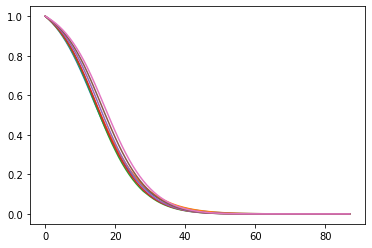

In [303]:
plt.plot(state_hist[:,3*layer_num:])

### Learn the parameter

In [302]:
#Set how many epoch?
epochs = 1000
for ep in range(epochs):
    y_hist_pred = greyIdentification(u_hist)
    loss = loss_fn(y_hist,y_hist_pred)
    if ep % 10 == 9:
        print(ep, loss.item())

    
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()#but why

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

9 25850405715968.0
19 19518019600384.0
29 15383747624960.0
39 13675096178688.0
49 14181431508992.0
59 14645430583296.0
69 14508097536000.0
79 14130296651776.0
89 13671779532800.0
99 13218177089536.0
109 12815484059648.0
119 12633043369984.0
129 12506209714176.0
139 12386297708544.0
149 12264599977984.0
159 12143318532096.0
169 12019792084992.0
179 11895320870912.0
189 11769593462784.0
199 11645967400960.0
209 11519334023168.0
219 11394079522816.0
229 11269179441152.0
239 11143553744896.0
249 11018818289664.0
259 10894544207872.0
269 10771932119040.0
279 10648969805824.0
289 10526249713664.0
299 10406305202176.0
309 10285207257088.0
319 10165370748928.0
329 10048686260224.0
339 9932370870272.0
349 9816640585728.0
359 9702450659328.0
369 9590757392384.0
379 9479095582720.0
389 9369397755904.0
399 9260162351104.0
409 9151767904256.0
419 9046566371328.0
429 8941214892032.0
439 8838219563008.0
449 8736416989184.0
459 8637223272448.0
469 8536524849152.0
479 8440545017856.0
489 8344497029120.

In [239]:
greyIdentification.input_scale

Parameter containing:
tensor([0.1373, 1.6323], requires_grad=True)

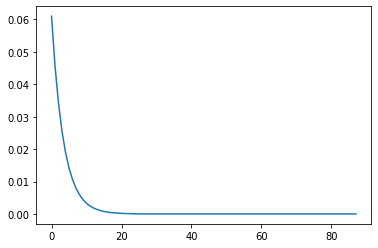

In [240]:
plt.plot((y_hist_pred[:,1]-y_hist_pred[:,0]).detach().numpy())
# plt.plot((y_hist[:,1]-y_hist[:,0]).numpy())
# plt.plot(y_hist[:,0].detach().numpy())

In [241]:
greyIdentification.K

Parameter containing:
tensor([ 0.3673,  1.0191,  0.4786, -0.4702,  0.3159,  0.5692, -0.0822,  0.6536],
       requires_grad=True)

In [242]:
greyIdentification.d

Parameter containing:
tensor([ 0.3831, -0.0154,  0.3782,  1.2481], requires_grad=True)

#### Save Model

In [131]:
def save_model(model, filename):
    try:
        do_save = input('Do you want to save the model (type yes to confirm)? ').lower()
        if do_save == 'yes':
            torch.save(model.state_dict(), filename)
            print('Model saved to %s.' % (filename))
        else:
            print('Model not saved.')
    except:
        raise Exception('The notebook should be run or validated with skip_training=True.')


def load_model(model, filename, device):
    model.load_state_dict(torch.load(filename, map_location=lambda storage, loc: storage))
    print('Model loaded from %s.' % filename)
    model.to(device)
    model.eval()

In [132]:
skip_training=T
if not skip_training:
    save_model(greyIdentification, 'greyIdentification.pth')
    
else:
    n_levels = len(selected_cols)
    model = CustomRnn(n_levels, use_true_params=False)
    load_model(greyIdentification, 'greyIdentification.pth', device)

Do you want to save the model (type yes to confirm)?  y


Model not saved.


tensor([204.5700, 204.6310, 199.2550, 207.5530, 207.3320, 206.8050, 207.5800])